In [4]:
import urllib.request
url = 'https://raw.githubusercontent.com/WalePhenomenon/climate_change/master/fuel_ferc1.csv'
filename = 'hamoye-1.csv'
urllib.request.urlretrieve(url, filename)

('hamoye-1.csv', <http.client.HTTPMessage at 0x7f00123bd940>)

In [5]:
import numpy as np
import pandas as pd

In [ ]:
!ls -la ../content

total 2604
drwxr-xr-x 1 root root    4096 Jul 12 20:38 .
drwxr-xr-x 1 root root    4096 Jul 12 20:29 ..
drwxr-xr-x 1 root root    4096 Jun 26 16:26 .config
-rw-r--r-- 1 root root 2649320 Jul 12 20:38 hamoye-1.csv
drwxr-xr-x 1 root root    4096 Jun 26 16:26 sample_data


In [6]:
df = pd.read_csv('/content/hamoye-1.csv')

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 29523 entries, 0 to 29522
Data columns (total 11 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   record_id                     29523 non-null  object 
 1   utility_id_ferc1              29523 non-null  int64  
 2   report_year                   29523 non-null  int64  
 3   plant_name_ferc1              29523 non-null  object 
 4   fuel_type_code_pudl           29523 non-null  object 
 5   fuel_unit                     29343 non-null  object 
 6   fuel_qty_burned               29523 non-null  float64
 7   fuel_mmbtu_per_unit           29523 non-null  float64
 8   fuel_cost_per_unit_burned     29523 non-null  float64
 9   fuel_cost_per_unit_delivered  29523 non-null  float64
 10  fuel_cost_per_mmbtu           29523 non-null  float64
dtypes: float64(5), int64(2), object(4)
memory usage: 2.5+ MB


In [ ]:
pd.set_option('display.max_rows', df.shape[0]+1)

In [7]:
df

,record_id,utility_id_ferc1,report_year,plant_name_ferc1,fuel_type_code_pudl,fuel_unit,fuel_qty_burned,fuel_mmbtu_per_unit,fuel_cost_per_unit_burned,fuel_cost_per_unit_delivered,fuel_cost_per_mmbtu
0,f1_fuel_1994_12_1_0_7,1,1994,rockport,coal,ton,5377489.0,16.590,18.59,18.53,1.121
1,f1_fuel_1994_12_1_0_10,1,1994,rockport total plant,coal,ton,10486945.0,16.592,18.58,18.53,1.120
2,f1_fuel_1994_12_2_0_1,2,1994,gorgas,coal,ton,2978683.0,24.130,39.72,38.12,1.650
3,f1_fuel_1994_12_2_0_7,2,1994,barry,coal,ton,3739484.0,23.950,47.21,45.99,1.970
4,f1_fuel_1994_12_2_0_10,2,1994,chickasaw,gas,mcf,40533.0,1.000,2.77,2.77,2.570
...,...,...,...,...,...,...,...,...,...,...,...
29518,f1_fuel_2018_12_12_0_13,12,2018,neil simpson ct #1,gas,mcf,18799.0,1.059,4.78,4.78,9.030
29519,f1_fuel_2018_12_12_1_1,12,2018,cheyenne prairie 58%,gas,mcf,806730.0,1.050,3.65,3.65,6.950
29520,f1_fuel_2018_12_12_1_10,12,2018,lange ct facility,gas,mcf,104554.0,1.060,4.77,4.77,8.990
29521,f1_fuel_2018_12_12_1_13,12,2018,wygen 3 bhp 52%,coal,ton,315945.0,16.108,3.06,14.76,1.110


In [ ]:
grouped = df.groupby('report_year')
x= df['fuel_cost_per_unit_burned']
grouped.filter(lambda x : x.mean().min())

TypeError: ignored

In [8]:
df.isnull().sum()

record_id                         0
utility_id_ferc1                  0
report_year                       0
plant_name_ferc1                  0
fuel_type_code_pudl               0
fuel_unit                       180
fuel_qty_burned                   0
fuel_mmbtu_per_unit               0
fuel_cost_per_unit_burned         0
fuel_cost_per_unit_delivered      0
fuel_cost_per_mmbtu               0
dtype: int64

In [ ]:
df.duplicated().any()

False

In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 29523 entries, 0 to 29522
Data columns (total 11 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   record_id                     29523 non-null  object 
 1   utility_id_ferc1              29523 non-null  int64  
 2   report_year                   29523 non-null  int64  
 3   plant_name_ferc1              29523 non-null  object 
 4   fuel_type_code_pudl           29523 non-null  object 
 5   fuel_unit                     29343 non-null  object 
 6   fuel_qty_burned               29523 non-null  float64
 7   fuel_mmbtu_per_unit           29523 non-null  float64
 8   fuel_cost_per_unit_burned     29523 non-null  float64
 9   fuel_cost_per_unit_delivered  29523 non-null  float64
 10  fuel_cost_per_mmbtu           29523 non-null  float64
dtypes: float64(5), int64(2), object(4)
memory usage: 2.5+ MB


In [10]:
grouped = df.groupby('fuel_type_code_pudl').groups
grouped

{'coal': Int64Index([    0,     1,     2,     3,     5,     7,     8,     9,    11,
                13,
             ...
             29485, 29487, 29489, 29492, 29501, 29503, 29510, 29516, 29517,
             29521],
            dtype='int64', length=8547),
 'gas': Int64Index([    4,    10,    12,    28,    30,    32,    33,    35,    37,
                39,
             ...
             29508, 29509, 29511, 29512, 29513, 29515, 29518, 29519, 29520,
             29522],
            dtype='int64', length=11486),
 'nuclear': Int64Index([    6,    45,    52,    53,    54,    69,    93,   105,   106,
               109,
             ...
             29025, 29040, 29051, 29063, 29081, 29177, 29187, 29318, 29390,
             29395],
            dtype='int64', length=818),
 'oil': Int64Index([   14,    19,    21,    23,    25,    27,    34,    36,    40,
                43,
             ...
             29490, 29491, 29495, 29499, 29500, 29502, 29505, 29506, 29507,
             29514],
    

In [11]:
df['fuel_qty_burned'].skew()

15.851495469109503

In [12]:
df['fuel_qty_burned'].kurt()

651.3694501337732

In [ ]:
df.isnull().sum()

record_id                         0
utility_id_ferc1                  0
report_year                       0
plant_name_ferc1                  0
fuel_type_code_pudl               0
fuel_unit                       180
fuel_qty_burned                   0
fuel_mmbtu_per_unit               0
fuel_cost_per_unit_burned         0
fuel_cost_per_unit_delivered      0
fuel_cost_per_mmbtu               0
dtype: int64

In [13]:
df['fuel_unit'].isnull().sum()

180

In [14]:
df['fuel_unit'].count()

29343

In [15]:
(df['fuel_unit'].isnull().sum()/df['fuel_unit'].count())*100

0.6134342091810653

In [16]:
d_cor= df.corr()
d_cor

,utility_id_ferc1,report_year,fuel_qty_burned,fuel_mmbtu_per_unit,fuel_cost_per_unit_burned,fuel_cost_per_unit_delivered,fuel_cost_per_mmbtu
utility_id_ferc1,1.000000,0.093323,-0.057447,-0.066946,-0.037863,-0.016414,0.006122
report_year,0.093323,1.000000,0.012952,-0.110853,0.013599,-0.014043,0.010261
fuel_qty_burned,-0.057447,0.012952,1.000000,-0.080946,-0.018535,-0.003551,-0.001896
fuel_mmbtu_per_unit,-0.066946,-0.110853,-0.080946,1.000000,-0.010034,-0.009039,-0.005884
fuel_cost_per_unit_burned,-0.037863,0.013599,-0.018535,-0.010034,1.000000,0.011007,-0.000437
fuel_cost_per_unit_delivered,-0.016414,-0.014043,-0.003551,-0.009039,0.011007,1.000000,-0.000109
fuel_cost_per_mmbtu,0.006122,0.010261,-0.001896,-0.005884,-0.000437,-0.000109,1.000000


In [17]:
h = df.sort_values(by='fuel_cost_per_unit_delivered')
h

,record_id,utility_id_ferc1,report_year,plant_name_ferc1,fuel_type_code_pudl,fuel_unit,fuel_qty_burned,fuel_mmbtu_per_unit,fuel_cost_per_unit_burned,fuel_cost_per_unit_delivered,fuel_cost_per_mmbtu
17525,f1_fuel_2008_12_177_1_1,177,2008,mexico c.t.,oil,bbl,811.0,5.754000,86.628,-874.937,15.055
16634,f1_fuel_2007_12_177_2_4,177,2007,mexico c.t.,oil,bbl,2240.0,5.754000,77.605,-488.054,13.487
12975,f1_fuel_2004_12_210_1_6,210,2004,sycamore,oil,bbl,588.0,5.712420,38.722,-313.410,6.779
7736,f1_fuel_2000_12_194_3_6,194,2000,nelson dewey u 1&2,waste,ton,116.0,0.015500,-174.670,-174.670,-5.635
7730,f1_fuel_2000_12_194_2_15,194,2000,nelson dewey unit 1,waste,ton,77.0,0.015500,-123.310,-174.670,-3.978
...,...,...,...,...,...,...,...,...,...,...,...
3566,f1_fuel_1997_12_9_0_14,9,1997,hope creek 1,nuclear,gramsU,52526.0,0.000066,39.660,1942979.000,0.560
3245,f1_fuel_1996_12_9_0_14,9,1996,hope creek 1,nuclear,gramsU,58795.0,0.000065,35.964,2114508.000,0.095
3565,f1_fuel_1997_12_9_0_11,9,1997,salem 1&2,nuclear,gramsU,36919.0,0.000056,61.100,2255688.000,1.087
3244,f1_fuel_1996_12_9_0_8,9,1996,peach bt 2&3,nuclear,gramsU,211407.0,0.000065,36.865,7793482.000,0.145


In [ ]:
df.loc['report_year',['fuel_cost_per_unit_delivered'].max()]

AttributeError: ignored

In [18]:
sd = df['fuel_cost_per_unit_burned'].pct_change()
qw = pd.merge(df,)

TypeError: ignored

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 29523 entries, 0 to 29522
Data columns (total 11 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   record_id                     29523 non-null  object 
 1   utility_id_ferc1              29523 non-null  int64  
 2   report_year                   29523 non-null  int64  
 3   plant_name_ferc1              29523 non-null  object 
 4   fuel_type_code_pudl           29523 non-null  object 
 5   fuel_unit                     29343 non-null  object 
 6   fuel_qty_burned               29523 non-null  float64
 7   fuel_mmbtu_per_unit           29523 non-null  float64
 8   fuel_cost_per_unit_burned     29523 non-null  float64
 9   fuel_cost_per_unit_delivered  29523 non-null  float64
 10  fuel_cost_per_mmbtu           29523 non-null  float64
dtypes: float64(5), int64(2), object(4)
memory usage: 2.5+ MB


In [21]:
yre = df.groupby('report_year')['fuel_cost_per_unit_delivered'].mean()
yre.sort_values(ascending=False)

report_year
1997    11140.197239
1996     9196.705948
2000      985.362877
2009      652.694163
2018      499.269966
2015      326.535511
1998      287.154420
2014      192.737183
2013      172.307591
2004      139.524275
2016      103.901761
2010       91.862105
1994       63.636060
2012       60.994502
2001       60.050396
2011       59.774667
2008       58.588197
2003       55.663493
2002       47.594361
2017       46.196861
2007       43.325023
2005       41.438184
2006       38.657484
1995       32.735269
1999       25.551627
Name: fuel_cost_per_unit_delivered, dtype: float64

In [ ]:
year = df.groupby('report_year')
k_1994 = (year.get_group(1994)).fuel_cost_per_unit_burned.sum()
k_1998 = (year.get_group(1998)).fuel_cost_per_unit_burned.sum()
k_1994

263292.11500000005

In [ ]:
k_1998

140238.65600000002

In [ ]:
s = pd.Series([k_1994, k_1998])
s.pct_change()

0         NaN
1   -0.467365
dtype: float64

In [ ]:
ft = df.groupby('fuel_type_code_pudl')['fuel_cost_per_unit_burned'].mean()
ft

fuel_type_code_pudl
coal         67.421830
gas          13.659397
nuclear    4955.157002
oil         168.877086
other        18.253856
waste        19.518122
Name: fuel_cost_per_unit_burned, dtype: float64

In [ ]:
df.corr().min()

utility_id_ferc1               -0.066946
report_year                    -0.110853
fuel_qty_burned                -0.080946
fuel_mmbtu_per_unit            -0.110853
fuel_cost_per_unit_burned      -0.037863
fuel_cost_per_unit_delivered   -0.016414
fuel_cost_per_mmbtu            -0.005884
dtype: float64

In [ ]:
df['fuel_mmbtu_per_unit'].std()

10.600220307806886

In [ ]:
df.fuel_mmbtu_per_unit.quantile(0.75)

17.006

In [ ]:
df['fuel_cost_per_unit_burned'].describe()

count     29523.000000
mean        208.649031
std        2854.490090
min        -276.080000
25%           5.207000
50%          26.000000
75%          47.113000
max      139358.000000
Name: fuel_cost_per_unit_burned, dtype: float64

In [ ]:
(df.groupby('fuel_type_code_pudl').mean().groupby('fuel_type_code_pudl')['fuel_cost_per_unit_burned'].mean())

fuel_type_code_pudl
coal         67.421830
gas          13.659397
nuclear    4955.157002
oil         168.877086
other        18.253856
waste        19.518122
Name: fuel_cost_per_unit_burned, dtype: float64

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


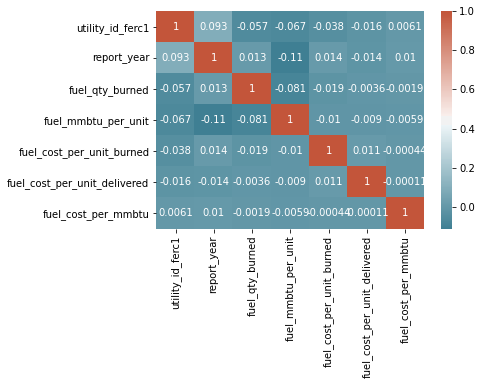

In [ ]:
import seaborn as sns
corr = df.corr()
sns.heatmap(corr, xticklabels=corr.columns, yticklabels=corr.columns, annot=True, cmap=sns.diverging_palette(220, 20, as_cmap=True))